In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#Reading in data and concatenating into one table
import pandas as pd
import numpy as np
import spacy
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
plt.style.use('seaborn')

all_housing_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/all_housing_data_wNumRooms1.csv")
print(all_housing_data.shape)
all_housing_data = all_housing_data.dropna(thresh = 15)
print(all_housing_data.shape)
all_housing_data.head(2)

(10902, 18)
(10765, 18)


,Unnamed: 0,price,year_built,square_footage,acreage,beds,baths,cooling,heating,description,address,city,state,photo,numRooms,lat,lon,dataset
0,0,345000,2002.0,3600.0,0.62,6.0,3.5,Central Air,Forced Air,2002 home built by contractor-owner. 3300 sq/f...,Custom Home,Centerfield,UT,http://img.ksl.com/mx/mplace-homes.ksl.com/617...,NaN,39.11790,-111.81960,ksl
1,2,215000,1900.0,2700.0,0.36,4.0,2.5,Evaporative Cooler,Radiant Heat,This is a beautiful oolite stone home in Manti...,112 West 300 North,Manti,UT,http://img.ksl.com/mx/mplace-homes.ksl.com/196...,NaN,39.26987,-111.64016,ksl


In [4]:
# Filtering (masking) the data to only include data points inside Utah's boundaries
# columns = list(all_housing_data.columns.values)

# all_housing_data = all_housing_data[(all_housing_data['state'] == 'UT') | (all_housing_data['state'] == 'PA')]

utah_data = all_housing_data[all_housing_data['state'] == 'UT']
utah_data = utah_data.reset_index(drop = True)

pittsburgh_data = all_housing_data[all_housing_data['state'] == 'PA']
pittsburgh_data = pittsburgh_data.reset_index(drop = True)

print(utah_data.shape)
print(pittsburgh_data.shape)

(8418, 18)
(2280, 18)


/usr/local/lib/python3.6/dist-packages/scipy/cluster/vq.py:580: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


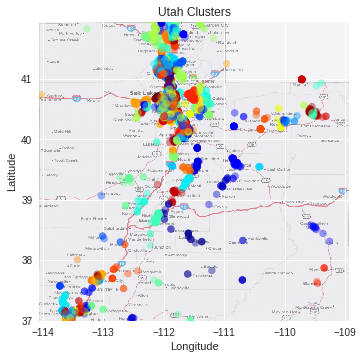

In [5]:
#Displaying clustered data points on map

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.image as mpimg

# There are 344 zip codes in Utah
# There are 252 cities in Utah
# We want the data to be more granular so we arbirtrarily selected 400 clusters
n_clusters = 400

lat_coords_ut = list(utah_data['lat'])
lon_coords_ut = list(utah_data['lon'])

lat_coords_pitt = list(pittsburgh_data['lat'])
lon_coords_pitt = list(pittsburgh_data['lon'])

coordinates_ut = []

for lat, lon in zip(lat_coords_ut, lon_coords_ut):
    coord_array = []
    coord_array.append(lat)
    coord_array.append(lon)
    
    coordinates_ut.append(coord_array)
    
coordinates_ut = np.array(coordinates_ut)
    
coordinates_pitt = []

for lat, lon in zip(lat_coords_pitt, lon_coords_pitt):
    coord_array = []
    coord_array.append(lat)
    coord_array.append(lon)
    
    coordinates_pitt.append(coord_array)

coordinates_pitt = np.array(coordinates_pitt)

x_ut, y_ut = kmeans2(whiten(coordinates_ut), n_clusters, iter = 20, minit = 'points')  
utah_img=mpimg.imread("/content/drive/My Drive/Colab Notebooks/map-of-utah-cities.jpg")
plt.scatter(coordinates_ut[:,1], coordinates_ut[:,0], c = y_ut, cmap='jet', alpha = 0.4);
plt.imshow(utah_img, extent=[-114.0566, -108.9426, 36.9959, 41.9425], alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Utah Clusters")
plt.show()

In [6]:
import collections
print(collections.Counter(y_ut))
y_ut = [str(x) + 'ut' for x in y_ut]
y_ut = pd.DataFrame(y_ut)
print(y_ut.shape)
print(utah_data.shape)
utah_data = pd.concat([utah_data, y_ut], axis = 1)
print(utah_data.shape)
utah_data = utah_data.drop(columns = 'Unnamed: 0')
# utah_data = utah_data.rename(columns = {0:'cluster'})
utah_data.shape

Counter({347: 141, 44: 68, 316: 67, 173: 58, 324: 58, 163: 57, 271: 55, 3: 54, 223: 53, 209: 51, 43: 49, 387: 48, 365: 48, 34: 48, 278: 48, 312: 48, 104: 48, 72: 48, 171: 46, 325: 46, 172: 45, 298: 45, 119: 45, 130: 44, 92: 43, 143: 42, 167: 42, 389: 42, 344: 42, 377: 41, 23: 41, 157: 41, 203: 40, 147: 40, 269: 39, 118: 38, 343: 38, 160: 38, 85: 38, 302: 37, 36: 37, 310: 36, 58: 36, 9: 36, 111: 35, 175: 34, 115: 34, 86: 34, 295: 34, 288: 34, 207: 34, 101: 34, 206: 34, 283: 33, 241: 33, 135: 33, 17: 33, 348: 33, 350: 33, 208: 32, 40: 32, 392: 32, 90: 32, 87: 32, 213: 32, 342: 32, 257: 31, 131: 31, 155: 31, 369: 31, 320: 31, 116: 31, 158: 31, 231: 30, 57: 30, 305: 30, 124: 30, 73: 30, 202: 30, 181: 30, 218: 30, 76: 29, 251: 29, 178: 29, 149: 29, 388: 28, 11: 28, 235: 28, 156: 28, 322: 28, 75: 28, 396: 28, 102: 28, 262: 28, 329: 27, 358: 27, 308: 27, 368: 27, 290: 27, 331: 27, 228: 27, 245: 27, 78: 27, 222: 27, 166: 26, 6: 26, 336: 26, 20: 26, 217: 26, 237: 26, 319: 26, 125: 26, 340: 26, 

(8418, 18)

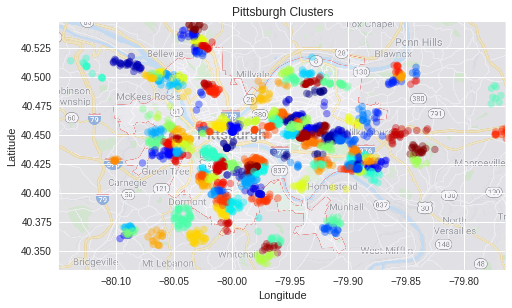

In [7]:
n_clusters = 150
max_lat = 0
min_lat = 0
max_lon = 0
min_lon = 0

for index, row in pittsburgh_data.iterrows():
        if row['lat'] > max_lat:
            max_lat = row['lat'] + 0.1
        elif row['lat'] < min_lat:
            min_lat = row['lat'] - 0.1
        if row['lon'] < min_lon:
            min_lon = row['lon'] - 0.1
        elif row['lon'] > max_lon:
            max_lon = row['lon'] + 0.1
            
x_pitt, y_pitt = kmeans2(whiten(coordinates_pitt), n_clusters, iter = 20, minit = 'points')  
pitt_img=mpimg.imread("/content/drive/My Drive/Colab Notebooks/Pittsburgh.PNG")
plt.scatter(coordinates_pitt[:,1], coordinates_pitt[:,0], c = y_pitt, cmap='jet', alpha = 0.4);
plt.imshow(pitt_img, extent=[-80.149, -79.76425, 40.3337, 40.5473], alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Pittsburgh Clusters")
plt.show()

In [8]:
print(collections.Counter(y_pitt))
pittsburgh_data = pittsburgh_data.reset_index()
y_pitt = [str(x) + 'p' for x in y_pitt]

y_pitt = pd.DataFrame(y_pitt)
print(y_pitt.shape)
print(pittsburgh_data.shape)

pittsburgh_data = pd.concat([pittsburgh_data, y_pitt], axis = 1)
print(pittsburgh_data.shape)
pittsburgh_data = pittsburgh_data.drop(columns = 'Unnamed: 0')
pittsburgh_data = pittsburgh_data.drop(columns = 'index')
# pittsburgh_data = pittsburgh_data.rename(columns = {0:'cluster'})
pittsburgh_data.head(1)

Counter({66: 49, 138: 45, 144: 45, 61: 44, 19: 37, 122: 36, 62: 35, 7: 35, 147: 34, 102: 32, 99: 32, 4: 30, 116: 29, 124: 27, 123: 26, 43: 26, 77: 26, 140: 25, 130: 25, 126: 24, 129: 24, 69: 24, 84: 24, 108: 23, 50: 23, 15: 23, 55: 23, 64: 23, 148: 22, 70: 22, 90: 21, 45: 21, 143: 20, 13: 20, 34: 20, 127: 19, 94: 19, 29: 19, 115: 18, 53: 18, 17: 18, 59: 18, 105: 18, 39: 18, 101: 18, 21: 18, 11: 18, 149: 17, 83: 17, 79: 17, 18: 17, 68: 17, 54: 17, 31: 17, 76: 17, 146: 17, 5: 16, 3: 16, 74: 16, 81: 16, 137: 15, 109: 15, 44: 15, 134: 15, 92: 15, 67: 15, 89: 15, 49: 14, 106: 14, 37: 14, 88: 14, 60: 14, 40: 14, 104: 14, 12: 13, 63: 13, 110: 13, 145: 13, 141: 13, 48: 13, 80: 13, 113: 13, 47: 12, 0: 12, 28: 12, 22: 12, 82: 12, 97: 12, 24: 12, 86: 12, 107: 12, 120: 11, 9: 11, 117: 11, 118: 11, 65: 11, 142: 11, 30: 11, 136: 11, 119: 10, 41: 10, 33: 10, 111: 10, 128: 10, 131: 10, 133: 10, 139: 9, 27: 9, 114: 9, 35: 9, 6: 9, 56: 9, 75: 9, 72: 9, 87: 9, 95: 9, 91: 9, 121: 9, 46: 8, 42: 8, 8: 8, 93

,price,year_built,square_footage,acreage,beds,baths,cooling,heating,description,address,city,state,photo,numRooms,lat,lon,dataset,0
0,159464,1890.0,1430.0,0.024679,2.0,1.0,Central,Other,Perfect location in the heart of Bloomfield.,315 Ella St,Pittsburgh,PA,https://photos.zillowstatic.com/p_d/ISibs4xli1...,5.0,40.462545,-79.952051,zillow,5p


In [0]:
# Cleaning data for one hot encoding (Strings to float)

all_housing_data = all_housing_data.replace("No Acreage Data", 0)
all_housing_data = all_housing_data.replace("No Garage Data", 0)
all_housing_data = all_housing_data.replace("False", 0)
# ksl_data = ksl_data.replace("No Build Year Data", ksl_data.Year_Built.mean())

# Checking for "False's" in the Acreage values.  There are none.
for x in all_housing_data.acreage.values:
    if x == "False":
        print(x)

In [0]:
all_data_with_clusters = pd.concat([utah_data, pittsburgh_data], axis = 0, sort = False)
# all_data_with_clusters = all_data_with_clusters.drop(columns = 'Unnamed: 0')
# all_data_with_clusters = all_data_with_clusters.drop(columns = 'index')
# all_data_with_clusters = all_data_with_clusters.drop(columns = 0)
all_data_with_clusters = all_data_with_clusters.rename(columns = {0:'cluster'})

# all_data_with_clusters

In [0]:
# Maximum number of API calls is 100 per day
# This method returns the plotly map of the cluster that is sent to it.
import plotly.plotly as py
import plotly

def plot_clusters(cluster):
    
    latitudes = []
    longitudes = []
    prices = []

    mapbox_access_token = 'pk.eyJ1IjoiY21vdXJpdHMiLCJhIjoiY2p1a2lxZWtnMGozbDN5cXZrOTA2dmN3ZyJ9.a-FL0j8evsSASfSmDmFENQ'
    plotly.tools.set_credentials_file(username='cmourits', api_key='GMTeXmc42oOOYHFGeVZp')

    for index, row in all_data_with_clusters.iterrows():
        if row['cluster'] == cluster: 
            latitudes.append(row['lat'])
            longitudes.append(row['lon'])
            prices.append(row['price'])

    data = [
        go.Scattermapbox(
            lat=latitudes,
            lon=longitudes,
            mode='markers',
            marker=go.scattermapbox.Marker(
                size=10
            ),
            text=prices
        )
    ]

    layout = go.Layout(
        title=go.layout.Title(
            text='Cluster {}, ({} Listings)'.format(cluster, len(prices)),
            xref='paper',
            x=0,
        ),
        autosize=True,
        hovermode='closest',
        mapbox=go.layout.Mapbox(
            accesstoken=mapbox_access_token,
            bearing=0,
            center=go.layout.mapbox.Center(
                lat=np.mean(latitudes),
                lon=np.mean(longitudes)
            ),
            pitch=0,
            zoom=12
        ),
    )
    print("Number of listings in cluster {}: {}".format(cluster, len(prices)))

    return data, layout    

In [16]:
# Check individual clusters to see if they make sense at the neighborhood level
from collections import Counter
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import *

most_common1, num_most_common1 = Counter(all_data_with_clusters.cluster).most_common(1)[0]
most_common2, num_most_common2 = Counter(all_data_with_clusters.cluster).most_common(2)[1]
most_common3, num_most_common3 = Counter(all_data_with_clusters.cluster).most_common(3)[2]
most_common4, num_most_common4 = Counter(all_data_with_clusters.cluster).most_common(4)[3]
most_common5, num_most_common5 = Counter(all_data_with_clusters.cluster).most_common(5)[4]

squirrel_hill_cluster = '50p'
squirrel_hill = []
for i, row in all_data_with_clusters.iterrows():
    if 'squirrel hill' in str(row['description']).lower():
        squirrel_hill.append(row['cluster'])

# print("The cluster with the most listings is", most_common1, "with", num_most_common1, "listings.")
# print("The cluster with the 2nd most listings is", most_common2, "with", num_most_common2, "listings.")
# print("The cluster with the 3rd most listings is", most_common3, "with", num_most_common3, "listings.")
# print("The cluster with the 4th most listings is", most_common4, "with", num_most_common4, "listings.")
# print("The cluster with the 5th most listings is", most_common5, "with", num_most_common5, "listings.")
# print("The Squirrel Hill cluster is 50p and has", squirrel_hill, "listings.")

# # Plot the most common cluster
# data, layout = plot_clusters(most_common5)
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='Multiple Mapbox')

squirrel_hill = pd.Series(squirrel_hill)

print(squirrel_hill.value_counts())

116p    12
76p      9
119p     8
63p      8
4p       6
39p      4
34p      3
128p     2
111p     2
38p      2
1p       2
29p      1
52p      1
146p     1
8p       1
92p      1
113p     1
dtype: int64


In [18]:
# Plot the second most common cluster
data, layout = plot_clusters('116p')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')

Number of listings in cluster 116p: 29
High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~cmourits/0 or inside your plot.ly account where it is named 'Multiple Mapbox'


In [14]:
# Plot the third most common cluster
data, layout = plot_clusters('50p')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')

Number of listings in cluster 50p: 23
High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~cmourits/0 or inside your plot.ly account where it is named 'Multiple Mapbox'


In [46]:
bellefield_prices = [row['price'] for i, row in all_data_with_clusters.iterrows() if row['cluster'] == '50p']
squirrel_hill_prices = [row['price'] for i, row in all_data_with_clusters.iterrows() if row['cluster'] == '116p']

print(bellefield_prices)
print(squirrel_hill_prices)

sq_hi_price_df = pd.DataFrame(squirrel_hill_prices)
belle_price_df = pd.DataFrame(bellefield_prices)

print("===========================================")
print("Squirrel Hill Max: ", sq_hi_price_df.max())
print("Squirrel Hill Min: ", sq_hi_price_df.min())
print("Squirrel Hill Mean: ", sq_hi_price_df.mean())
print("Squirrel Hill Std Dev:", sq_hi_price_df.std())
print("===========================================")
print("Bellefield Max: ", belle_price_df.max())
print("Bellefield Min: ", belle_price_df.min())
print("Bellefield Mean: ", belle_price_df.mean())
print("Bellefield Std Dev:", belle_price_df.std())
print("===========================================")

# "{:,}".format(value)

[287378, 865390, 1099804, 899369, 615936, 648171, 311444, 1513783, 486077, 651352, 314793, 424369, 612351, 230126, 312413, 792273, 878827, 626182, 837365, 309099, 1037620, 704506, 547763]
[805804, 899899, 763202, 481811, 850207, 441711, 630473, 1409489, 683849, 545540, 803394, 569408, 2070260, 563492, 635336, 518745, 419343, 686045, 498344, 1253919, 841110, 635040, 1228741, 559770, 594450, 355490, 681640, 532404, 725301]
Squirrel Hill Max:  0    2070260
dtype: int64
Squirrel Hill Min:  0    355490
dtype: int64
Squirrel Hill Mean:  0    747731.62069
dtype: float64
Squirrel Hill Std Dev: 0    354966.022897
dtype: float64
Bellefield Max:  0    1513783
dtype: int64
Bellefield Min:  0    230126
dtype: int64
Bellefield Mean:  0    652451.782609
dtype: float64
Bellefield Std Dev: 0    314364.254152
dtype: float64


/usr/local/lib/python3.6/dist-packages/scipy/cluster/vq.py:580: UserWarning:

One of the clusters is empty. Re-run kmeans with a different initialization.



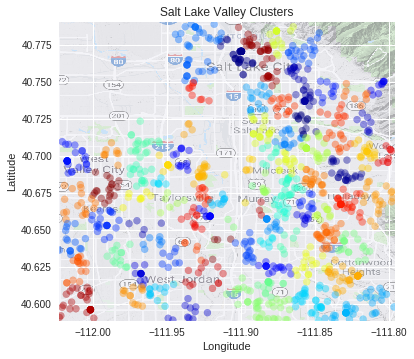

In [0]:
# Salt lake City specific clusters

n_lat = 40.7906
s_lat = 40.5886
w_lon = -112.023
e_lon = -111.7963
n_clusters = 100

slc_ksl_data = utah_data[utah_data['lat'] < n_lat]
slc_ksl_data = slc_ksl_data[slc_ksl_data['lat'] > s_lat]
slc_ksl_data = slc_ksl_data[slc_ksl_data['lon'] < e_lon]
slc_ksl_data = slc_ksl_data[slc_ksl_data['lon'] > w_lon]

lat_coords = list(slc_ksl_data['lat'])
lon_coords = list(slc_ksl_data['lon'])

coordinates = []

for lat, lon in zip(lat_coords, lon_coords):
    coord_array = []
    coord_array.append(lat)
    coord_array.append(lon)
    
    coordinates.append(coord_array)

coordinates= np.array(coordinates)

x, y = kmeans2(whiten(coordinates), n_clusters, iter = 20)  
utah_img=mpimg.imread("/content/drive/My Drive/Colab Notebooks/SLC_MAP.PNG")
plt.scatter(coordinates[:,1], coordinates[:,0], c = y, cmap='jet', alpha = 0.4);
plt.imshow(utah_img, extent=[w_lon, e_lon, s_lat, n_lat], alpha=0.5)
# plt.imshow(utah_img, extent=[-113, -111, 39, 42])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Salt Lake Valley Clusters")
plt.show()

/usr/local/lib/python3.6/dist-packages/scipy/cluster/vq.py:580: UserWarning:

One of the clusters is empty. Re-run kmeans with a different initialization.



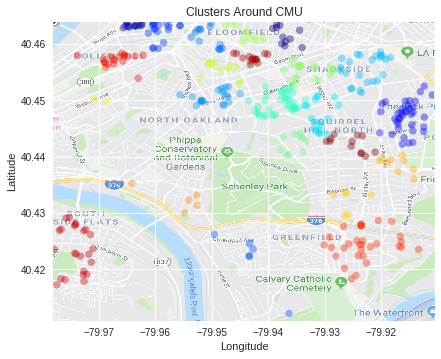

In [0]:
# Salt lake City specific clusters

n_lat = 40.463896
s_lat = 40.410876
w_lon = -79.978078
e_lon = -79.910511
n_clusters = 30

pitt_cmu_data = pittsburgh_data[pittsburgh_data['lat'] < n_lat]
pitt_cmu_data = pitt_cmu_data[pitt_cmu_data['lat'] > s_lat]
pitt_cmu_data = pitt_cmu_data[pitt_cmu_data['lon'] < e_lon]
pitt_cmu_data = pitt_cmu_data[pitt_cmu_data['lon'] > w_lon]

lat_coords = list(pitt_cmu_data['lat'])
lon_coords = list(pitt_cmu_data['lon'])

coordinates = []

for lat, lon in zip(lat_coords, lon_coords):
    coord_array = []
    coord_array.append(lat)
    coord_array.append(lon)
    
    coordinates.append(coord_array)

coordinates= np.array(coordinates)

x, y = kmeans2(whiten(coordinates), n_clusters, iter = 20)  
cmu_img=mpimg.imread("/content/drive/My Drive/Colab Notebooks/pitt_around_cmu.PNG")
plt.scatter(coordinates[:,1], coordinates[:,0], c = y, cmap='jet', alpha = 0.4);
plt.imshow(cmu_img, extent=[w_lon, e_lon, s_lat, n_lat], alpha=0.8)
# plt.imshow(utah_img, extent=[-113, -111, 39, 42])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters Around CMU")
plt.show()

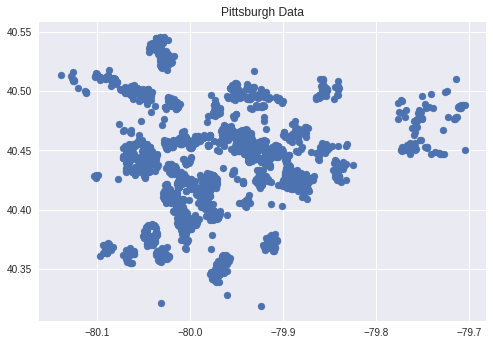

K: 1  Distortion =  0.07464789001137384
K: 11  Distortion =  0.020802685082562933
K: 21  Distortion =  0.012450849890589076
K: 31  Distortion =  0.00905865943393986
K: 41  Distortion =  0.00746504137327305
K: 51  Distortion =  0.006213100510211795
K: 61  Distortion =  0.005465736068025136
K: 71  Distortion =  0.005062285984805159
K: 81  Distortion =  0.004652312164463474
K: 91  Distortion =  0.004346957843941162


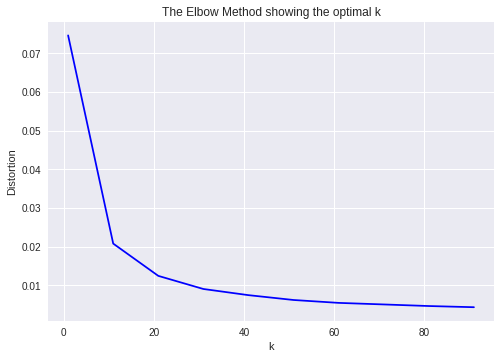

In [0]:
 # clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

pitt_data = pd.concat([pittsburgh_data['lat'], pittsburgh_data['lon']], axis = 1)

plt.plot()
plt.title('Pittsburgh Data')
plt.scatter(pittsburgh_data['lon'], pittsburgh_data['lat'])
plt.show()

# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1, 100, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pitt_data)
    distortions.append(sum(np.min(cdist(pitt_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / pitt_data.shape[0])
    print("K:", k, " Distortion = ", sum(np.min(cdist(pitt_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / pitt_data.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

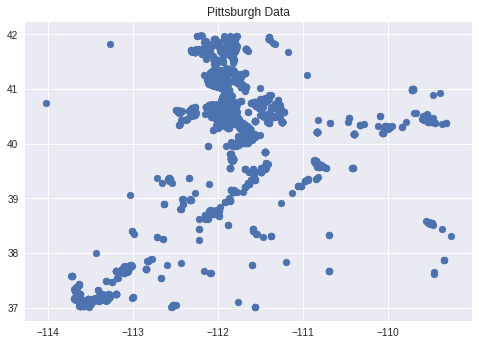

K: 1  Distortion =  0.7739211186786217
K: 11  Distortion =  0.16380322386941257
K: 21  Distortion =  0.10127671997051693
K: 31  Distortion =  0.07552736488830712
K: 41  Distortion =  0.06339529973306192
K: 51  Distortion =  0.05357519213626838
K: 61  Distortion =  0.04650359480449163
K: 71  Distortion =  0.042748554088258395
K: 81  Distortion =  0.037617065972481906
K: 91  Distortion =  0.035147935947941356


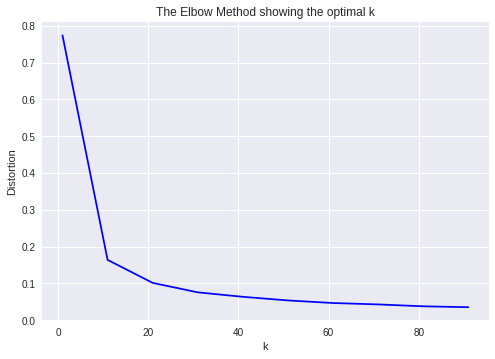

In [0]:
 # clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

ut_data = pd.concat([utah_data['lat'], utah_data['lon']], axis = 1)

plt.plot()
plt.title('Pittsburgh Data')
plt.scatter(utah_data['lon'], utah_data['lat'])
plt.show()

# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1, 100, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(ut_data)
    distortions.append(sum(np.min(cdist(ut_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / ut_data.shape[0])
    print("K:", k, " Distortion = ", sum(np.min(cdist(ut_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / ut_data.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [0]:
from google.colab import files

all_data_with_clusters.to_csv('final_housing_data.csv')
files.download('final_housing_data.csv')